In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance 
import numpy as np
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn import metrics

In [2]:
#load in 2 dataframes
df1= pd.read_csv('Zeel_ConversionActions.csv',skiprows=2,index_col='Day',parse_dates=True)
df2= pd.read_csv('Zeel_RegularStats.csv',skiprows=2,index_col='Day',parse_dates=True)

In [3]:
#combine dataframes
df=df1.merge(df2,on=['Day','Campaign'])

In [4]:
df.columns.tolist()

['Campaign',
 'Path - Android App Install_All conv.',
 'Path - Corporate Inquiry – Contact_All conv.',
 'Path - Corporate – Booking_All conv.',
 'Path - CurrentCustomer – Booking_All conv.',
 'Path - Email Capture (No Password)_All conv.',
 'Path - Gift Card – Booking_All conv.',
 'Path - NetNewCustomer – Booking_All conv.',
 'Path - UpgradingCustomer – Booking_All conv.',
 ' Clicks ',
 ' Impressions ',
 ' Cost ',
 ' Avg. position ',
 ' Conversions ',
 'Search Impr. share']

In [5]:
df.dtypes

Campaign                                        object
Path - Android App Install_All conv.             int64
Path - Corporate Inquiry – Contact_All conv.     int64
Path - Corporate – Booking_All conv.             int64
Path - CurrentCustomer – Booking_All conv.       int64
Path - Email Capture (No Password)_All conv.     int64
Path - Gift Card – Booking_All conv.             int64
Path - NetNewCustomer – Booking_All conv.        int64
Path - UpgradingCustomer – Booking_All conv.     int64
 Clicks                                          int64
 Impressions                                     int64
 Cost                                            int64
 Avg. position                                   int64
 Conversions                                     int64
Search Impr. share                              object
dtype: object

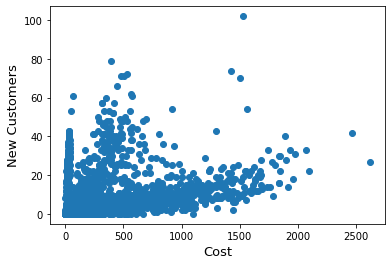

In [6]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df[' Conversions '])
plt.ylabel('New Customers', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

In [7]:
#clean data
df['Path - NetNewCustomer – Booking_All conv.'] = pd.to_numeric(df['Path - NetNewCustomer – Booking_All conv.'],errors='coerce')
df[' Clicks '] = pd.to_numeric(df[' Clicks '],errors='coerce')
df[' Impressions '] = pd.to_numeric(df[' Impressions '],errors='coerce')
df['Search Impr. share'] = pd.to_numeric(df['Search Impr. share'],errors='coerce')
df[' Conversions '] = pd.to_numeric(df[' Conversions '],errors='coerce')
df[' Cost '] = pd.to_numeric(df[' Cost '],errors='coerce')


df = df[(df[' Conversions '] > 0) & (df[' Cost '] > 100)]

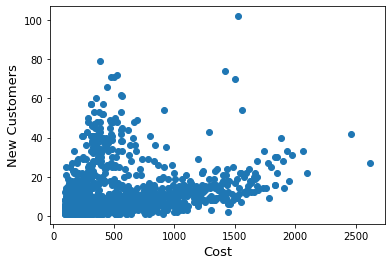

In [8]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df[' Conversions '])
plt.ylabel('New Customers', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

In [9]:
#Removing certain attributes

df = df[~df["Campaign"].str.contains("Brand", na=False)]
df = df[~df["Campaign"].str.contains("YouTube", na=False)]
df = df[~df["Campaign"].str.contains("GDN", na=False)]
df = df[~df["Campaign"].str.contains("Croud", na=False)]
df = df[~df["Campaign"].str.contains("Display", na=False)]

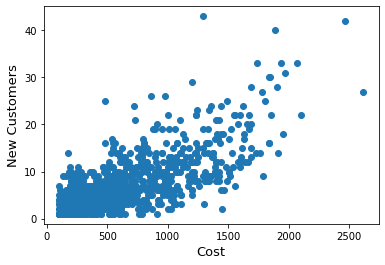

In [10]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df[' Conversions '])
plt.ylabel('New Customers', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

In [11]:
#creating new columns
df['CPA']=df[' Cost ']/df[' Conversions ']
df['CTR']=df[' Clicks ']/df[' Impressions ']
df['CPC']=df[' Cost ']/df[' Clicks ']

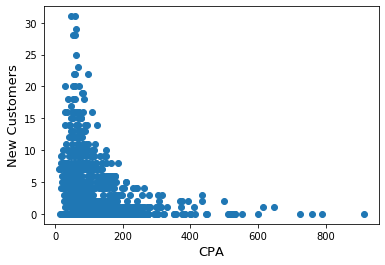

In [12]:
fig, ax = plt.subplots()
ax.scatter(df['CPA'], df['Path - NetNewCustomer – Booking_All conv.'])
plt.ylabel('New Customers', fontsize=13)
plt.xlabel('CPA', fontsize=13)
plt.show()

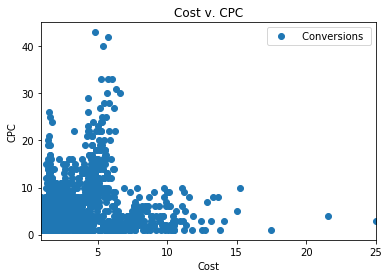

In [22]:
df.plot(x='CPC', y=' Conversions ', style='o')  
plt.title('Cost v. CPC')  
plt.xlabel('Cost')  
plt.ylabel('CPC')  
plt.show()

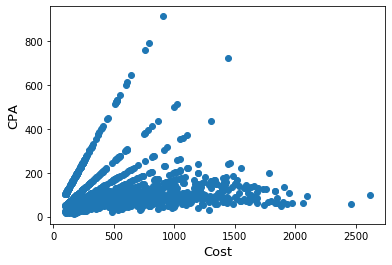

In [13]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df['CPA'])
plt.ylabel('CPA', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

In [14]:
#More cleaning
df = df[(df['CPA'] < 250)]

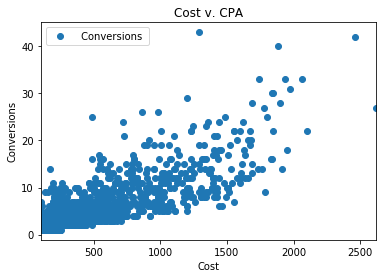

In [26]:
df.plot(x=' Cost ', y=' Conversions ', style='o')  
plt.title('Cost v. CPA')  
plt.xlabel('Cost')  
plt.ylabel('Conversions')  
plt.show()

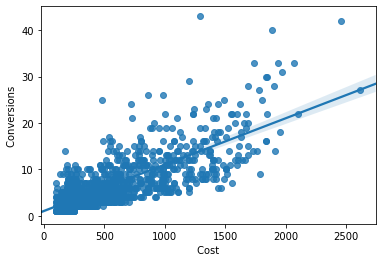

In [35]:
sns.regplot(x=" Cost ", y=" Conversions ", data=df);

In [17]:
df.describe()

,Path - Android App Install_All conv.,Path - Corporate Inquiry – Contact_All conv.,Path - Corporate – Booking_All conv.,Path - CurrentCustomer – Booking_All conv.,Path - Email Capture (No Password)_All conv.,Path - Gift Card – Booking_All conv.,Path - NetNewCustomer – Booking_All conv.,Path - UpgradingCustomer – Booking_All conv.,Clicks,Impressions,Cost,Avg. position,Conversions,Search Impr. share,CPA,CTR,CPC
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,0.0,1215.000000,1215.000000,1215.000000
mean,0.171193,0.431276,0.110288,0.873251,11.579424,0.099588,2.777778,0.138272,194.866667,4633.640329,550.035391,1.992593,6.175309,NaN,118.741653,0.055596,3.825191
std,0.452334,1.208840,0.580590,1.927534,16.546477,0.398669,4.418584,0.573129,149.690423,4701.787609,428.615882,0.494561,5.604016,NaN,92.120094,0.034898,2.753441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,93.000000,101.000000,1.000000,1.000000,NaN,12.214286,0.011924,0.911894
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,1727.000000,214.000000,2.000000,2.000000,NaN,61.550000,0.029525,1.831783
50%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,171.000000,2919.000000,415.000000,2.000000,5.000000,NaN,96.000000,0.041210,2.855596
75%,0.000000,0.000000,0.000000,1.000000,19.000000,0.000000,4.000000,0.000000,270.000000,4716.500000,776.500000,2.000000,8.000000,NaN,147.350000,0.069813,4.995454
max,4.000000,10.000000,9.000000,16.000000,89.000000,6.000000,31.000000,11.000000,831.000000,23411.000000,2617.000000,4.000000,43.000000,NaN,912.000000,0.245902,25.000000


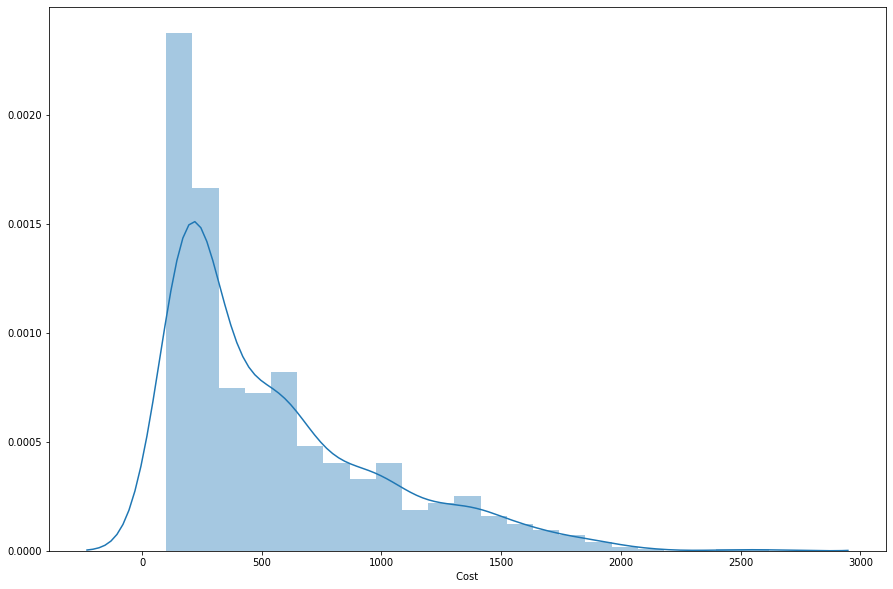

In [28]:
#Plot a histogram
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df[' Cost '])

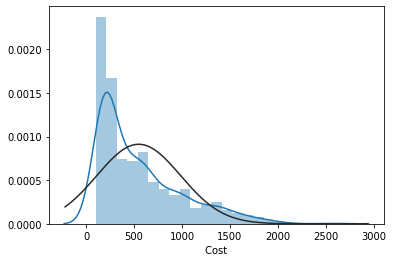

<Figure size 432x288 with 0 Axes>

In [38]:
sns.distplot(df[' Cost '], fit=norm);
fig = plt.figure()

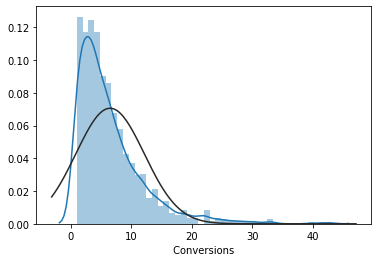

<Figure size 432x288 with 0 Axes>

In [39]:
sns.distplot(df[' Conversions '], fit=norm);
fig = plt.figure()

In [40]:
#Standardize the data
df[' Conversions '] = np.log(df[' Conversions '])
df[' Cost '] = np.log(df[' Cost '])

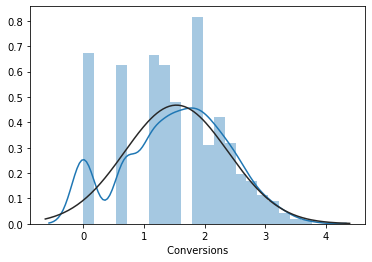

<Figure size 432x288 with 0 Axes>

In [41]:
sns.distplot(df[' Conversions '], fit=norm);
fig = plt.figure()

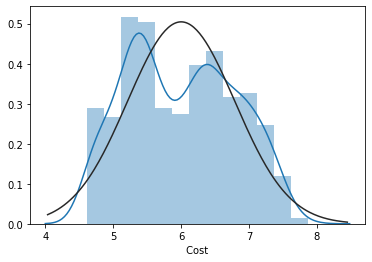

<Figure size 432x288 with 0 Axes>

In [42]:
sns.distplot(df[' Cost '], fit=norm);
fig = plt.figure()

In [29]:
#Reshape values to fit
X = df[' Cost '].values.reshape(-1,1)
y = df[' Conversions '].values.reshape(-1,1)

In [30]:
#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [33]:
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(lr.intercept_)

[0.94449292]


In [44]:
print(lr.coef_)

[[0.01019221]]


In [45]:
y_pred = regressor.predict(X_test)

In [46]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,4,6.845784
1,7,7.977119
2,2,3.706582
3,2,3.788120
4,2,4.022541
5,7,8.089233
6,12,7.243280
7,1,2.901398
8,12,11.116320
9,14,6.325981


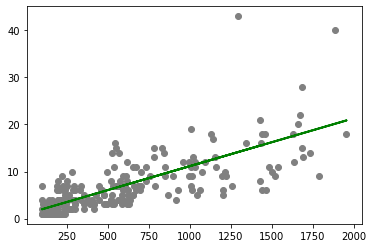

In [51]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='green', linewidth=2)
plt.show()

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.6494223317286565
Mean Squared Error: 16.14099693662084
Root Mean Squared Error: 4.017585958834091
